In [28]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


bank = pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\Logistic Regression\\bank-full.csv", header=0, delimiter=';')

def data_visualization(bank):
    
    # Data Distribution - Boxplot of continuous variables wrt to Categorical Columns

    sb.boxplot(x="y",y="age",data=bank,palette="hls")
    plt.show()
#There seems to be not much variation of age wrt to target Variable Values(y) as the median for both cases lie in somewhat same range
    
    sb.boxplot(x="y",y="balance",data=bank,palette="hls")
    plt.show()
#Average Balance maintained by individual for Subscribing and Not Subscribing case is to be very low for most of the Individuals as the Median for both
#the cases lies somewhat towards Zero Value from the plot

    sb.boxplot(x="y",y="duration",data=bank,palette="hls")
    plt.show()
#Its Evident from the plot that people who spend more time in the Calls talking to the Executive have higher chances of getting 
#Subscribed to the term Deposit

    sb.boxplot(x="y",y="previous",data=bank,palette="hls")
    plt.show()
#Cannot draw inferences from this Plot of Target Vs Previous as most of the records are highly concentrated close to Zero Value
# for both Values of Target Variable

    sb.boxplot(x="marital",y="duration",data=bank,palette="hls")
    plt.show()
#From the plot it seems to be that Married People Spend more time talking to the Executive rather than Single or Divorced people

    sb.boxplot(x="job",y="duration",data=bank,palette="hls")
    plt.show()
#Its evident from the plot that Different Job type people spending time talking to Executive would differ which means the Job
#category and Duration Spent are not independent variables
    
    return None

# data_visualization(bank)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [29]:
#Finding NaN Values in the Dataframe and eliminating them

print("Number of NaN/Missing Values present Each Column of the Dataframe: ",bank.isnull().sum())
bank.dropna(inplace=True) # Best Practice though there are no NaN Values present
#There were no NaN values presnt in the Dataframe so the shape of Df remains same even after dropna() has been called

Number of NaN/Missing Values present Each Column of the Dataframe:  age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [30]:
bank["Subscribe"] = 0
bank.loc[bank.y == "yes","Subscribe"] = 1

dummies=pd.get_dummies(bank[['job','marital','education','default','housing','loan','contact','month','poutcome']])
bank.drop(['job','marital','education','default','housing','loan','contact','month','poutcome','day','y'],axis=1,inplace=True)
bank = pd.concat([bank,dummies],axis=1)

features=['balance', 'duration', 'campaign', 'job_admin.', 'job_management', 'job_retired',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married', 
       'education_tertiary','housing_no', 'loan_no', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug',
       'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'poutcome_other', 'poutcome_success']
target=['Subscribe']
bank

,age,balance,duration,campaign,pdays,previous,Subscribe,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,151,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,76,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,92,1,-1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,198,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,456,2,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,1127,5,184,3,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,508,4,-1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [31]:
#Standardizing Each Column Values
standard_bank = pd.DataFrame(data = scale(bank[features]), columns = features)
standard_bank['Subscribe']=bank['Subscribe']
standard_bank

,balance,duration,campaign,job_admin.,job_management,job_retired,job_student,job_technician,job_unemployed,marital_married,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,poutcome_other,poutcome_success,Subscribe
0,0.256419,0.011016,-0.569351,-0.359369,1.944270,-0.229600,-0.145557,-0.449414,-0.172266,0.813212,...,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.205972,-0.185948,0
1,-0.437895,-0.416127,-0.569351,-0.359369,-0.514332,-0.229600,-0.145557,2.225121,-0.172266,-1.229691,...,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.205972,-0.185948,0
2,-0.446762,-0.707361,-0.569351,-0.359369,-0.514332,-0.229600,-0.145557,-0.449414,-0.172266,0.813212,...,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.205972,-0.185948,0
3,0.047205,-0.645231,-0.569351,-0.359369,-0.514332,-0.229600,-0.145557,-0.449414,-0.172266,0.813212,...,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.205972,-0.185948,0
4,-0.447091,-0.233620,-0.569351,-0.359369,-0.514332,-0.229600,-0.145557,-0.449414,-0.172266,-1.229691,...,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.205972,-0.185948,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,-0.176460,2.791329,0.076230,-0.359369,-0.514332,-0.229600,-0.145557,2.225121,-0.172266,0.813212,...,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,-0.661650,3.223067,-0.205972,-0.185948,1
45207,0.120447,0.768224,-0.246560,-0.359369,-0.514332,4.355402,-0.145557,-0.449414,-0.172266,-1.229691,...,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,-0.661650,3.223067,-0.205972,-0.185948,1
45208,1.429593,3.373797,0.721811,-0.359369,-0.514332,4.355402,-0.145557,-0.449414,-0.172266,0.813212,...,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,-0.661650,3.223067,-0.205972,5.377848,1
45209,-0.228024,0.970146,0.399020,-0.359369,-0.514332,-0.229600,-0.145557,-0.449414,-0.172266,0.813212,...,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,-0.661650,3.223067,-0.205972,-0.185948,0


In [32]:
train_data,test_data = train_test_split(standard_bank,test_size=0.3,random_state=8)

#Model Building
# Building a model on train data set 

logistic_regressor = sm.Logit(train_data[target],sm.add_constant(train_data[features])).fit_regularized(method='l1',maxiter=100)

#summary
logistic_regressor.summary()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.23807795372727353
            Iterations: 68
            Function evaluations: 68
            Gradient evaluations: 68


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Subscribe   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31620
Method:                           MLE   Df Model:                           26
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                  0.3373
Time:                        05:55:55   Log-Likelihood:                -7534.5
converged:                       True   LL-Null:                       -11370.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.8238      0.030    -94.197      0.000      -2.883      -2.765
balance                0.0570      0.019      2.983      0.003       0.020       0.094
duration               1.0806      0.020     54.169      0.000       1.042       1.120
campaign              -0.2566      0.037     -6.988      0.000      -0.329      -0.185
job_admin.             0.1161      0.023      4.983      0.000       0.070       0.162
job_management         0.0847      0.029      2.923      0.003       0.028       0.141
job_retired            0.1201      0.020      6.142      0.000       0.082       0.158
job_student            0.0961      0.017      5.604      0.000       0.062       0.130
job_technician         0.0714      0.025      2.847      0.004       0.022       0.120
job_unemployed         0.0474      0.020      2.323      0.020       0.007       0.087
marital_married       -0.1417      0.022     -6.399      0.000      -0.185      -0.098
education_tertiary     0.0766      0.026      2.942      0.003       0.026       0.128
housing_no             0.3434      0.026     13.403      0.000       0.293       0.394
loan_no                0.1558      0.026      5.960      0.000       0.105       0.207
contact_cellular       0.7188      0.040     17.944      0.000       0.640       0.797
contact_telephone      0.3248      0.029     11.289      0.000       0.268       0.381
month_apr             -0.1678      0.026     -6.551      0.000      -0.218      -0.118
month_aug             -0.5104      0.034    -15.024      0.000      -0.577      -0.444
month_feb             -0.2156      0.025     -8.605      0.000      -0.265      -0.167
month_jan             -0.3214      0.025    -12.717      0.000      -0.371      -0.272
month_jul             -0.5536      0.036    -15.225      0.000      -0.625      -0.482
month_jun             -0.1297      0.036     -3.558      0.000      -0.201      -0.058
month_mar              0.0765      0.015      5.131      0.000       0.047       0.106
month_may             -0.5366      0.045    -11.809      0.000      -0.626      -0.448
month_nov             -0.4536      0.031    -14.651      0.000      -0.514      -0.393
poutcome_other         0.0506      0.019      2.706      0.007       0.014       0.087
poutcome_success       0.4318      0.014     30.722      0.000       0.404       0.459
======================================================================================
"""

In [33]:
#pd.set_option('mode.chained_assignment', None)
train_preds_prob = logistic_regressor.predict(sm.add_constant(train_data[features]))

# Creating new column for storing predicted class of Target Variable and filling all the cells with zeros in that Column initially
train_data=train_data.assign(Predictions=0)

# Taking threshold value as 0.5 and the probability value above 0.5 will be treated as correct value 
train_data.loc[train_preds_prob >= 0.20,"Predictions"] = 1

# confusion matrix using pandas CrossTab
confusion_matrix = pd.crosstab(train_data["Subscribe"],train_data["Predictions"],margins=True)
confusion_matrix

Predictions,0,1,All
Subscribe,,,
0,25580,2390,27970
1,1212,2465,3677
All,26792,4855,31647


In [34]:
print("Classification Report of the Logit Model: ",classification_report(train_data["Subscribe"],train_data["Predictions"]))

Classification Report of the Logit Model:                precision    recall  f1-score   support

           0       0.95      0.91      0.93     27970
           1       0.51      0.67      0.58      3677

    accuracy                           0.89     31647
   macro avg       0.73      0.79      0.76     31647
weighted avg       0.90      0.89      0.89     31647



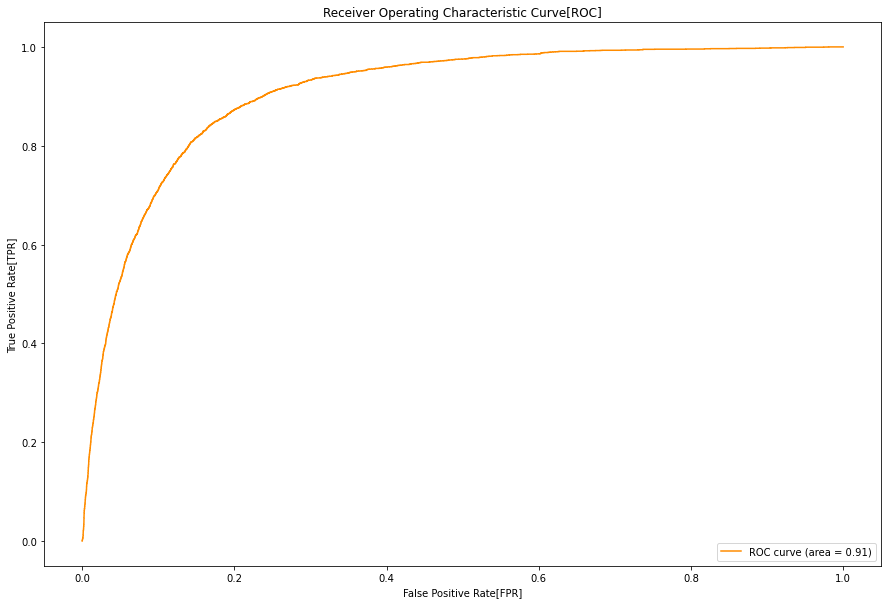

In [35]:
# ROC curve to determine Model's performance and the appropriate Threshold Level Value 
# fpr => false positive rate
# tpr => true positive rate

fpr, tpr, thresholds = metrics.roc_curve(train_data["Subscribe"],train_preds_prob) #applicable for binary classification Problem 
roc_auc = metrics.auc(fpr, tpr) # Area under ROC curve

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False Positive Rate[FPR]")
plt.ylabel("True Positive Rate[TPR]")
plt.title('Receiver Operating Characteristic Curve[ROC]')
plt.legend(loc="lower right")
plt.show() 

In [36]:
print("Model's Performance using ROC Curve on Train DataSet: ",roc_auc)

# Train Accuracy
print("Training Accuracy achieved by StatsModels Logistic Regression(%): ",100*(sum(train_data["Subscribe"]==train_data["Predictions"])/train_data.shape[0]))

Model's Performance using ROC Curve on Train DataSet:  0.9070946677493242
Training Accuracy achieved by StatsModels Logistic Regression(%):  88.61819445761051


In [37]:
# Prediction on Test data set

test_preds_prob = logistic_regressor.predict(sm.add_constant(test_data[features]))
test_data=test_data.assign(Predictions=0)
test_data.loc[test_preds_prob >= 0.20,"Predictions"] = 1

# confusion matrix using pandas CrossTab
confusion_matrix = pd.crosstab(test_data["Subscribe"],test_data["Predictions"],margins=True)


#Test Accuracy
print("Testing Accuracy achieved by StatsModels Logistic Regression(%): ",100*(sum(test_data["Subscribe"]==test_data["Predictions"])/test_data.shape[0]))

Testing Accuracy achieved by StatsModels Logistic Regression(%):  88.24093187850191
